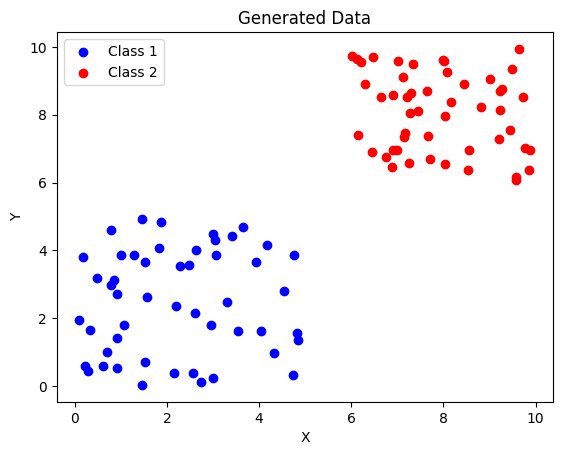

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Генерация данных
np.random.seed(42)  # Фиксируем seed для воспроизводимости

# Класс 1
x1 = np.random.uniform(0, 5, 50)
y1 = np.random.uniform(0, 5, 50)

# Класс 2
x2 = np.random.uniform(6, 10, 50)
y2 = np.random.uniform(6, 10, 50)

# Сохранение данных в Excel
data = {
    'x1': np.concatenate([x1, x2]),
    'y1': np.concatenate([y1, y2]),
    'class': [0]*50 + [1]*50
}
df = pd.DataFrame(data)
df.to_excel("data.xlsx", index=False)

# Визуализация данных
plt.scatter(x1, y1, color='blue', label='Class 1')
plt.scatter(x2, y2, color='red', label='Class 2')
plt.legend()
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Epoch [50/500], Loss: 0.3671
Epoch [100/500], Loss: 0.2650
Epoch [150/500], Loss: 0.1916
Epoch [200/500], Loss: 0.1424
Epoch [250/500], Loss: 0.1095
Epoch [300/500], Loss: 0.0871
Epoch [350/500], Loss: 0.0712
Epoch [400/500], Loss: 0.0597
Epoch [450/500], Loss: 0.0509
Epoch [500/500], Loss: 0.0442


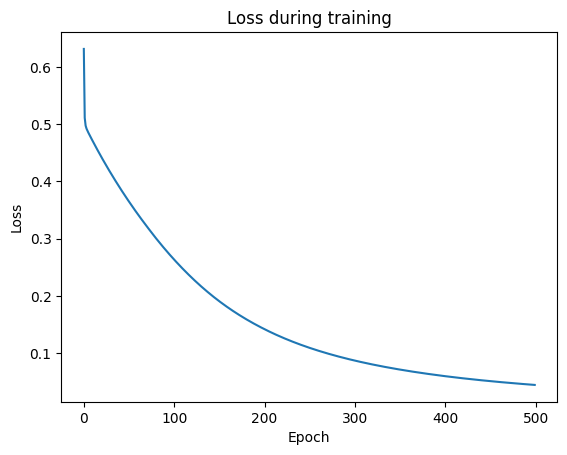

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

# Подготовка данных
X = df[['x1', 'y1']].values
y = df['class'].values

# Конвертация в PyTorch тензоры
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Определение модели
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

model = SimpleNN()

# Функция потерь и оптимизатор
criterion = nn.BCELoss()  # Бинарная кросс-энтропия
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Обучение модели
losses = []
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')

# Визуализация функции потерь
plt.plot(losses)
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

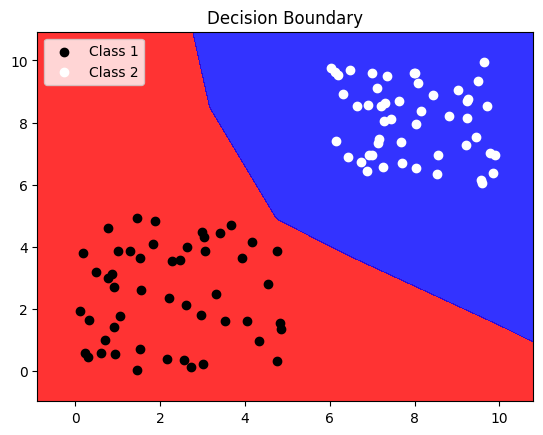

In [24]:
# Сетка для визуализации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

data = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
Z = model(data).detach().numpy().reshape(xx.shape)

# График
plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], colors=["red", "blue"])
plt.scatter(x1, y1, color='black', label='Class 1')
plt.scatter(x2, y2, color='white', label='Class 2')
plt.title("Decision Boundary")
plt.legend()
plt.show()

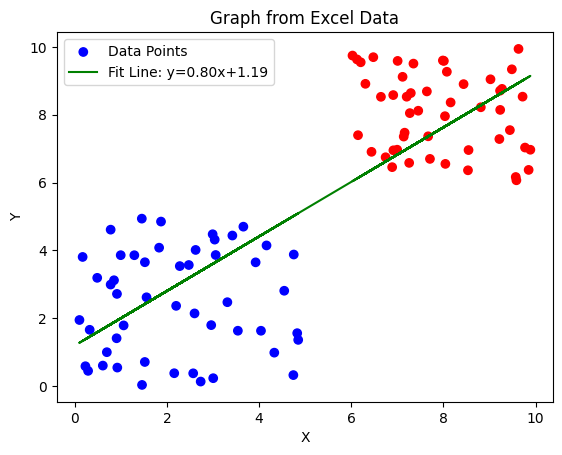

In [25]:
# Чтение данных из Excel и построение графика
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Чтение Excel
df = pd.read_excel("/content/data.xlsx")

# Построение графика
plt.scatter(df['x1'], df['y1'], c=df['class'], cmap='bwr', label='Data Points')

# Линейная регрессия
m, b = np.polyfit(df['x1'], df['y1'], 1)
plt.plot(df['x1'], m*df['x1'] + b, color='green', label=f'Fit Line: y={m:.2f}x+{b:.2f}')

plt.title("Graph from Excel Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()